In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('car.csv')

In [4]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
df.shape

(892, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


from above we understood that in price 2 values are null values,and km_driven as well as fuel_type column is also missing some values(null values) which need to replace.


In [7]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [8]:
df['year'].value_counts()

2015    117
2013     94
2014     94
2016     76
2012     75
       ... 
k...      1
D...      1
Eon       1
2 bs      1
arry      1
Name: year, Length: 61, dtype: int64

year have many entries other that any year i.e many non year values are present 
so that need to be clean 

also year is object data type here but it should be integer so tat need to chnage

In [9]:
df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [10]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [11]:
df['fuel_type'].value_counts()

Petrol    440
Diesel    395
LPG         2
Name: fuel_type, dtype: int64

from fual type we understood that nan is null value need to replace 

In [12]:
df['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [13]:
df['Price'].value_counts()

Ask For Price    35
2,50,000         17
3,50,000         14
1,80,000         13
4,00,000         12
                 ..
7,49,999          1
8,95,000          1
15,40,000         1
6,49,999          1
5,30,000          1
Name: Price, Length: 274, dtype: int64

From price we understood that price column have 35 entrices without any price value but it have ask for price so that need to change also price is in object here which need to change to integer with comma removed from it

In [14]:
df['name'].value_counts()

Honda City                              13
Honda Amaze                             11
Maruti Suzuki Dzire                     10
Maruti Suzuki Alto 800 Lxi               9
Mahindra Scorpio S10                     9
                                        ..
Maruti Suzuki Wagon R Select Variant     1
Tata Indica V2 eLS                       1
Honda City 1.5 V MT Exclusive            1
Maruti Suzuki Alto LX BSII               1
Renault Lodgy                            1
Name: name, Length: 525, dtype: int64

In [15]:
df['name'].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'


that need to clean for simplicity just by considering only 3 or 4 words of name columns

In [16]:
df['kms_driven'].value_counts()

35,000 kms      30
45,000 kms      30
55,000 kms      25
50,000 kms      23
20,000 kms      22
                ..
2,100 kms        1
30,600 kms       1
1,03,553 kms     1
49,800 kms       1
37,458 kms       1
Name: kms_driven, Length: 258, dtype: int64

In [17]:
df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

from kms_driven it need to change to integer data type and kms need to remove from end of each entrie

Also some nulll vales are there that need to replace

In [18]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

company: many of the names are not of any company like 'Used', 'URJENT', and so on.

In [19]:
# backup copy of orignal dataset
df_copy=df.copy()

# Cleaning the data 

data need to be clean to replace missing values and to chage data type of price and year column and to solve folloing issues
- name of car is inconsistent
- company have few entries which is nor company
- year have non year values and changing its data type
- price have object datatype chaging it to integer
- fual type have null value
- kms have object datatype 

In [20]:
# year column cleaning 

#year column have some values as integer where some are object values so we will check for string value type if that value is interger type we will keep that value and if it is object type we will reove that value

In [21]:
df['year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
887    zest
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 892, dtype: object

In [22]:
#str.isnumeric() will check for each row if value is numeric or not 
# if numeric retuns true else false

df['year'].str.isnumeric()

0       True
1       True
2       True
3       True
4       True
       ...  
887    False
888     True
889     True
890     True
891     True
Name: year, Length: 892, dtype: bool

In [23]:
# now the above str.isnumeric() is applied on data which will return
#th e rows which have numeric year only 

df[df['year'].str.isnumeric()]

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [24]:
# that new record is need to store back to df 

df= df[df['year'].str.isnumeric()]

In [25]:
# now year is object datatype do change it to integer
# with astype(int)

df['year'].astype(int)

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: int32

In [26]:
# repace df['year'] with avove integer datatype

In [27]:
df['year']=df['year'].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


 year datatype is change to int32 

In [29]:
# Price column cleaning

In [30]:
df['Price']

0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
886         3,00,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 842, dtype: object

In [31]:
# price have ask for price entry so exclude all record with that value

In [32]:
#checking condition 
df['Price']!='Ask For Price'

0       True
1       True
2      False
3       True
4       True
       ...  
886     True
888     True
889     True
890     True
891     True
Name: Price, Length: 842, dtype: bool

In [33]:
#removing all entry with price=ask for price of dataset 
# and replcing origanl dataset with new values
df=df[df['Price']!='Ask For Price']

In [34]:
# removing all the commans between price by replcing comma with empty space
#this is done by using replace function
df['Price']=df['Price'].str.replace(',','')

In [35]:
df['Price']

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 819, dtype: object

In [36]:
# changing datatype of price from object to integer
df['Price']=df['Price'].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


values are reduced from 842 to 819 and price dataype is int32


In [38]:
# kms_driven colum cleaning

In [39]:
df['kms_driven']

0        45,000 kms
1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 819, dtype: object

In [40]:
# removing kms from end of the string by spliting string using space between them
# and then only considering first part of string

df['kms_driven'].str.split(' ')

0        [45,000, kms]
1            [40, kms]
3        [28,000, kms]
4        [36,000, kms]
6        [41,000, kms]
            ...       
886    [1,32,000, kms]
888      [27,000, kms]
889      [40,000, kms]
890           [Petrol]
891           [Petrol]
Name: kms_driven, Length: 819, dtype: object

In [41]:
# considering only first part of string using str.get(0)

df['kms_driven'].str.split(' ').str.get(0)

0        45,000
1            40
3        28,000
4        36,000
6        41,000
         ...   
886    1,32,000
888      27,000
889      40,000
890      Petrol
891      Petrol
Name: kms_driven, Length: 819, dtype: object

In [42]:
# storing that result back to df['kms_driven']
df['kms_driven']=df['kms_driven'].str.split(' ').str.get(0)

In [43]:
# repacing comma of this kms to blank space and repcing origanl colum with new value

df['kms_driven']=df['kms_driven'].str.replace(',','')

In [44]:
df['kms_driven'].unique()

array(['45000', '40', '28000', '36000', '41000', '25000', '24530',
       '60000', '30000', '32000', '48660', '4000', '16934', '43000',
       '35550', '39522', '39000', '55000', '72000', '15975', '70000',
       '23452', '35522', '48508', '15487', '82000', '20000', '68000',
       '38000', '27000', '33000', '46000', '16000', '47000', '35000',
       '30874', '15000', '29685', '130000', '19000', '54000', '13000',
       '38200', '22000', '50000', '13500', '3600', '45863', '60500',
       '12500', '18000', '13349', '29000', '44000', '42000', '14000',
       '49000', '36200', '51000', '104000', '33333', '33600', '5600',
       '7500', '26000', '24330', '65480', '200000', '59000', '99000',
       '2800', '21000', '11000', '66000', '3000', '7000', '38500',
       '37200', '43200', '24800', '45872', '40000', '11400', '97200',
       '52000', '31000', '175430', '37000', '65000', '3350', '75000',
       '62000', '73000', '2200', '54870', '34580', '97000', '60', '80200',
       '3200', '0000',

In [45]:
# here some entries have value petrol so we will drop that entries

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [47]:
df= df[df['kms_driven'].str.isnumeric()]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.3+ KB


In [49]:
# chaning datatype
df['kms_driven']=df['kms_driven'].astype(int)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [51]:
# fual type have 1 null value so we will remove that value


In [52]:
# this will give fual typw with null value row
df[df['fuel_type'].isna()]

,name,company,year,Price,kms_driven,fuel_type
132,Toyota Corolla,Toyota,2009,275000,26000,NaN


In [53]:
# we will exclude above row and update df

df=df[~df['fuel_type'].isna()]

In [54]:
df[df['fuel_type'].isna()]

,name,company,year,Price,kms_driven,fuel_type


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [56]:
# cleaning on name column

In [57]:
df['name']

0        Hyundai Santro Xing XO eRLX Euro III
1                     Mahindra Jeep CL550 MDI
3      Hyundai Grand i10 Magna 1.2 Kappa VTVT
4            Ford EcoSport Titanium 1.5L TDCi
6                                   Ford Figo
                        ...                  
883                Maruti Suzuki Ritz VXI ABS
885                 Tata Indica V2 DLE BS III
886                      Toyota Corolla Altis
888                       Tata Zest XM Diesel
889                        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [58]:
# we want to keep only first 3 word from each name 
# so we will split name with space and 
# will get only 3 letters from result by slicing

In [59]:
df['name'].str.split(' ')

0        [Hyundai, Santro, Xing, XO, eRLX, Euro, III]
1                        [Mahindra, Jeep, CL550, MDI]
3      [Hyundai, Grand, i10, Magna, 1.2, Kappa, VTVT]
4              [Ford, EcoSport, Titanium, 1.5L, TDCi]
6                                        [Ford, Figo]
                            ...                      
883                  [Maruti, Suzuki, Ritz, VXI, ABS]
885                  [Tata, Indica, V2, DLE, BS, III]
886                          [Toyota, Corolla, Altis]
888                          [Tata, Zest, XM, Diesel]
889                            [Mahindra, Quanto, C8]
Name: name, Length: 816, dtype: object

In [60]:
# slicing the above list form 0 to 2 
df['name'].str.split(' ').str.slice(0,3)

0         [Hyundai, Santro, Xing]
1         [Mahindra, Jeep, CL550]
3           [Hyundai, Grand, i10]
4      [Ford, EcoSport, Titanium]
6                    [Ford, Figo]
                  ...            
883        [Maruti, Suzuki, Ritz]
885            [Tata, Indica, V2]
886      [Toyota, Corolla, Altis]
888              [Tata, Zest, XM]
889        [Mahindra, Quanto, C8]
Name: name, Length: 816, dtype: object

In [61]:
# joing above worls with space to form one name
df['name'].str.split(' ').str.slice(0,3).str.join(' ')

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
                ...          
883        Maruti Suzuki Ritz
885            Tata Indica V2
886      Toyota Corolla Altis
888              Tata Zest XM
889        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [62]:
#updating name in datset
df['name']=df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [63]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [64]:
# index are not in order so need to reset it 

In [65]:
df.reset_index()

,index,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...,...
811,883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,885,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [66]:
# removing old index
df=df.reset_index(drop=True)

In [67]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [68]:
# company cleaning

In [69]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

with all the cleaning above cooamny with ramdom name data has also been removed so no need to perform any additional cleaning for company

In [70]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


from descirb we get that min price of car is 3.000000e+04 i.e 30 thounsand. and max value of price is 8.500003e+06 i.e 85 lacks

also 75% cars are below 5 lackhs and rest are above 5 lacks 

3 now we will check how many cars have price above 60k lacks

In [71]:
df[df['Price']>6000000]

,name,company,year,Price,kms_driven,fuel_type
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


only one car is having price above 60k lackhs so this is outlier i.e an observation that lies outside the overall pattern we need to drop this value

In [72]:
df=df[df['Price']<6000000].reset_index(drop=True)

In [73]:
df.describe()

,year,Price,kms_driven
count,815.000000,8.150000e+02,815.000000
mean,2012.442945,4.017933e+05,46277.096933
std,4.005079,3.815888e+05,34318.459638
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56879.000000
max,2019.000000,3.100000e+06,400000.000000


In [74]:
df.to_csv('Cleaned_Car_data.csv')

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

### Checking relationship of Company with Price

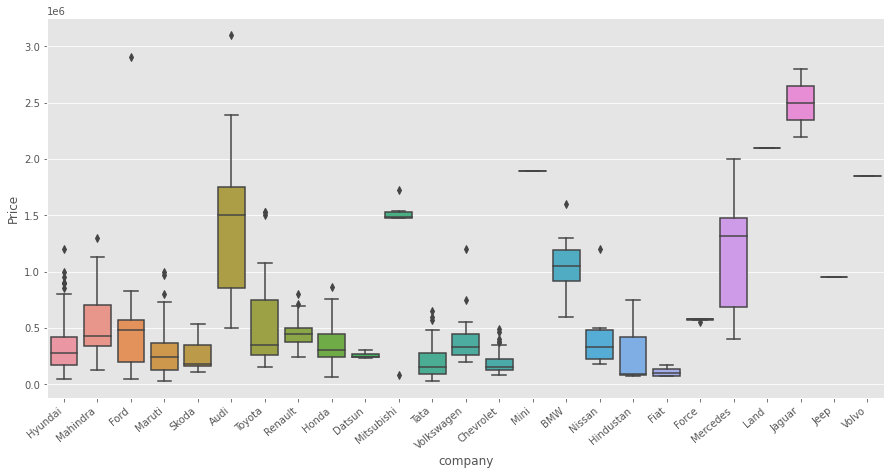

In [76]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

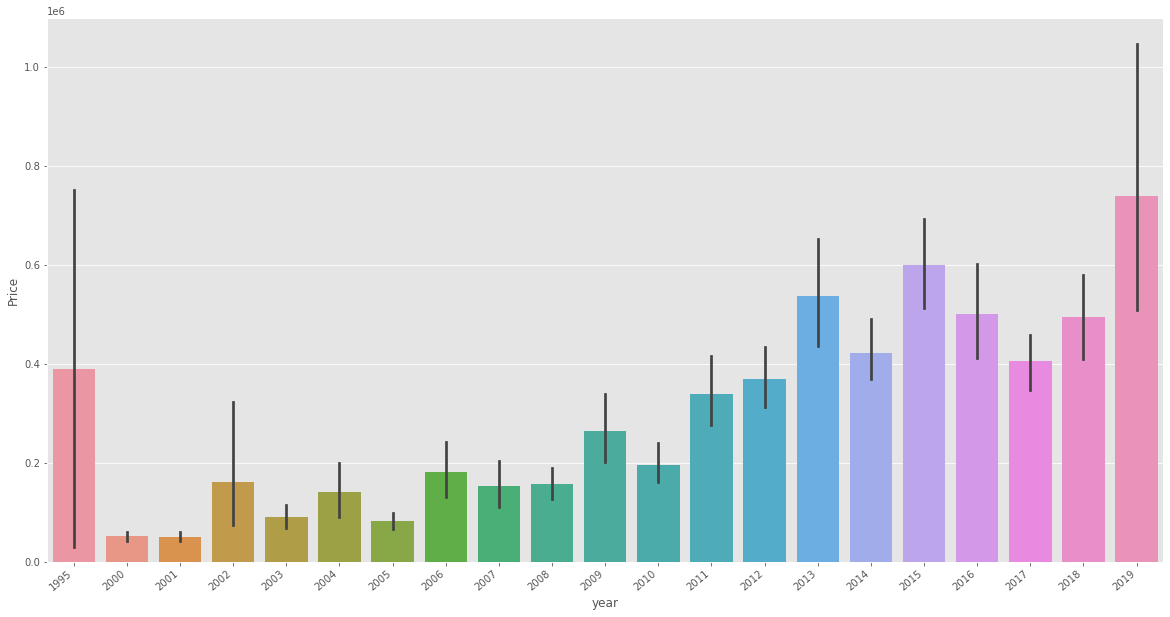

In [77]:
plt.subplots(figsize=(20,10))
ax=sns.barplot(x='year',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

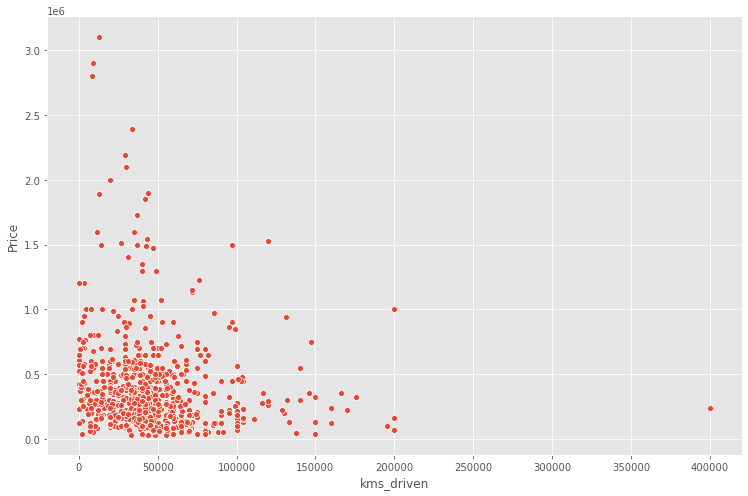

In [78]:
sns.relplot(x='kms_driven',y='Price',data=df,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

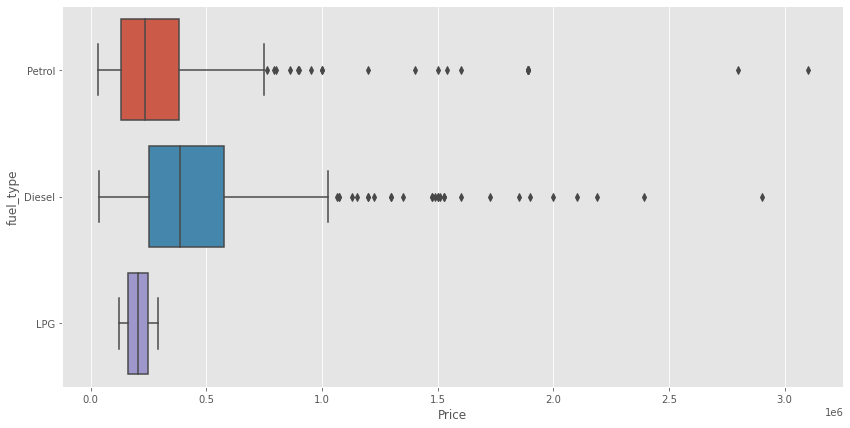

In [79]:
plt.subplots(figsize=(14,7))
sns.boxplot(y='fuel_type',x='Price',data=df)

### Relationship of Price with FuelType, Year and Company mixed

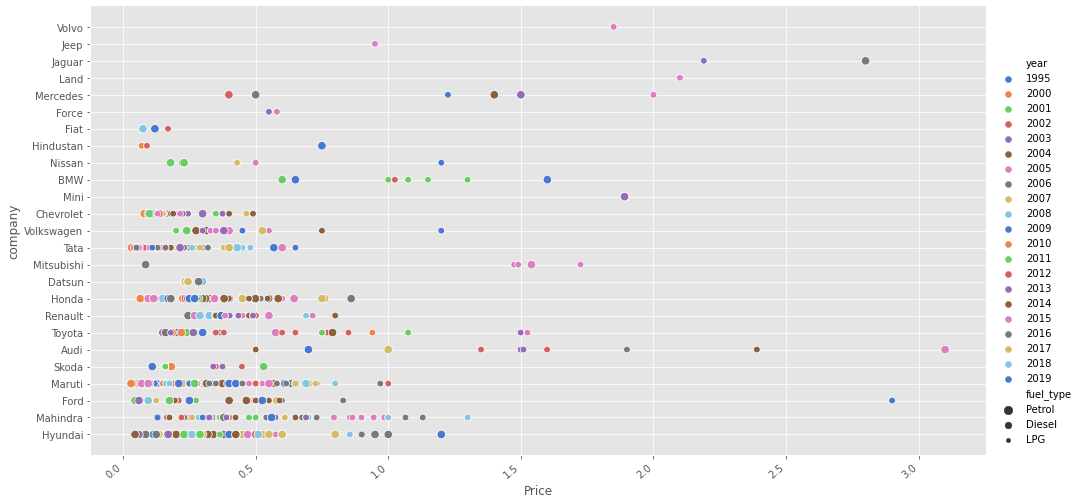

In [80]:
ax=sns.relplot(y='company',x='Price',data=df,hue='year',size='fuel_type',height=7,palette='muted',aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

# Model Build

In [81]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [82]:
X=df[['name', 'company', 'year', 'kms_driven', 'fuel_type']]
y=df['Price']

In [83]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


In [84]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
810    270000
811    110000
812    300000
813    260000
814    390000
Name: Price, Length: 815, dtype: int32

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [87]:
#Creating an OneHotEncoder object to contain all the possible categories

In [88]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

### Creating a column transformer to transform categorical columns

In [89]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [90]:
# Linear Regression Model

lr=LinearRegression()

### Making a pipeline

In [91]:
pipe=make_pipeline(column_trans,lr)

In [92]:
##Fitting the  model
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [93]:
y_pred=pipe.predict(X_test)

In [94]:
r2_score(y_test,y_pred)

0.6463621098445448

In [95]:
# now we will check for better r2 score by testing different random states
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [96]:
np.argmax(scores)

655

In [97]:
# we got best r2 score at random state 655 so we will check that score
scores[np.argmax(scores)]

0.920088412025344

In [98]:
# now we will check r2 score at that random state here it is 655

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=655)
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.920088412025344

In [99]:
# lete prrdict value for any car 
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([416109.14071676])